In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("uber_data.csv")

In [9]:
data.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [15]:
data.shape

(693071, 57)

In [22]:
print("Shape:", data.shape)
data.info()

Shape: (693071, 57)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 no

In [30]:
# Count missing values
data.isnull().sum().sort_values(ascending=False)

price                          55095
id                                 0
ozone                              0
temperatureLowTime                 0
apparentTemperatureHigh            0
apparentTemperatureHighTime        0
apparentTemperatureLow             0
apparentTemperatureLowTime         0
icon                               0
dewPoint                           0
pressure                           0
windBearing                        0
cloudCover                         0
uvIndex                            0
visibility.1                       0
sunriseTime                        0
temperatureHighTime                0
sunsetTime                         0
moonPhase                          0
precipIntensityMax                 0
uvIndexTime                        0
temperatureMin                     0
temperatureMinTime                 0
temperatureMax                     0
temperatureMaxTime                 0
apparentTemperatureMin             0
apparentTemperatureMinTime         0
a

In [34]:
#Convert Unix timestamps to readable format:
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data['weekday'] = data['datetime'].dt.day_name()


In [54]:
print(data['cab_type'].value_counts())
print("")
print("******Cab Type******")
print(data['name'].value_counts())
print("")
print(data['source'].value_counts())
print("")
print(data['destination'].value_counts())


cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

******Cab Type******
name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: count, dtype: int64

destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University    

>visualizations

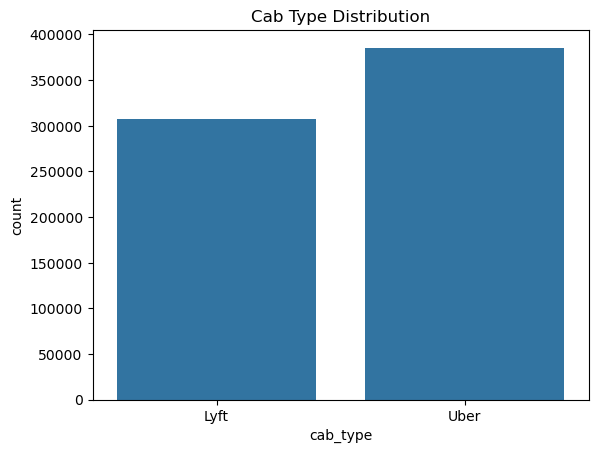

In [58]:
sns.countplot(data, x='cab_type')
plt.title('Cab Type Distribution')
plt.show()


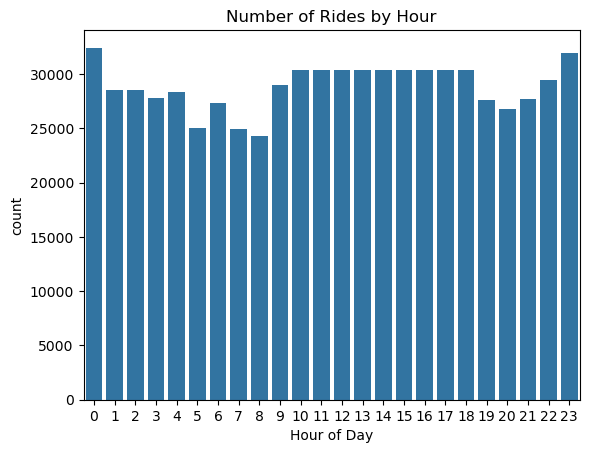

In [60]:
sns.countplot(data, x='hour')
plt.title('Number of Rides by Hour')
plt.xlabel('Hour of Day')
plt.show()


 Why Rides Increase at Night (Especially 11 PM & Midnight)?

some of the reasons are:-          
1. Late-Night Social Activities
People often return home from:  
    Parties, clubs, restaurants, or bars.   
    Social events, concerts, or movie nights.   
These usually end between 10 PM to 1 AM, increasing ride demand.

2. End of Work Shifts
Many jobs have late-night shifts or second shifts ending around 11 PM or midnight:    
    BPO/Call centers   
    Hospitals   
    Airports, hotels, transport hubs

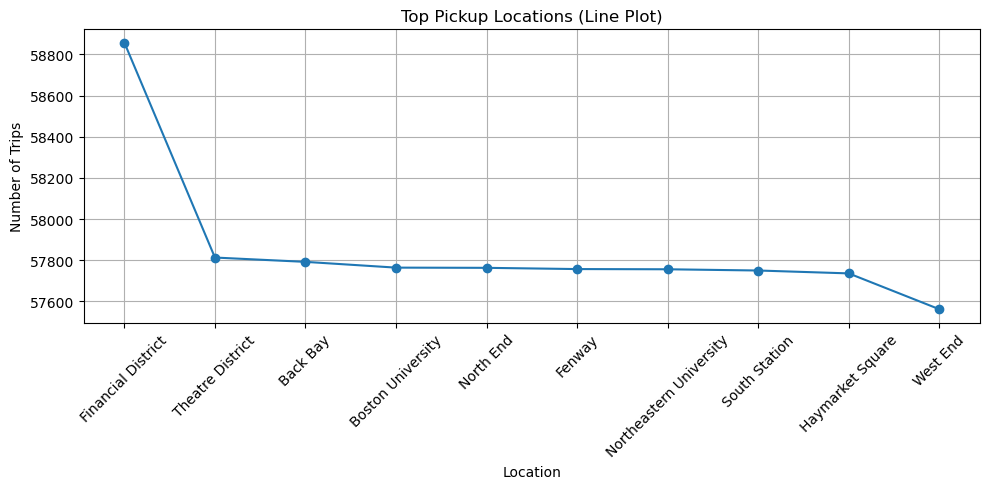

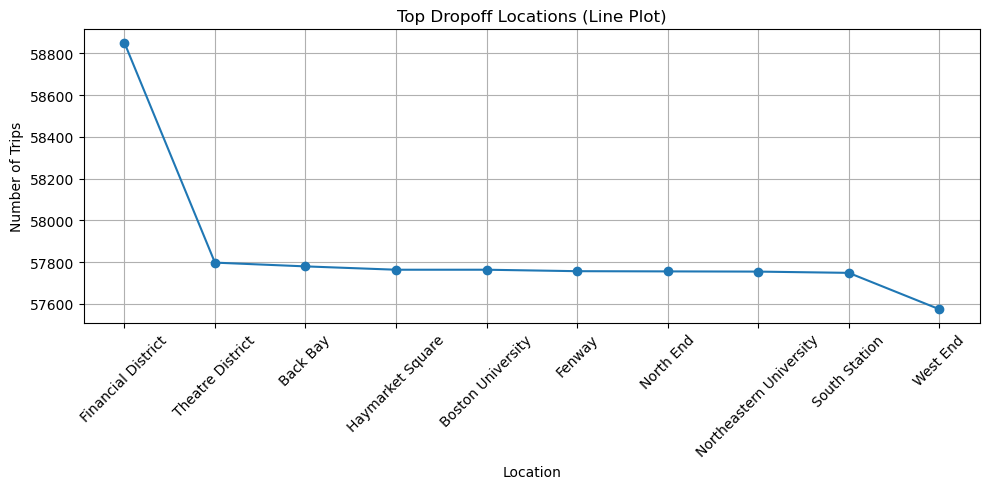

In [66]:
# Line plot for top pickup locations
top_sources = data['source'].value_counts().head(10)
top_sources = top_sources.sort_values(ascending=False)  # optional for visual clarity

plt.figure(figsize=(10,5))
plt.plot(top_sources.index, top_sources.values, marker='o', linestyle='-')
plt.title('Top Pickup Locations (Line Plot)')
plt.xlabel('Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot for top dropoff locations
top_dest = data['destination'].value_counts().head(10)
top_dest = top_dest.sort_values(ascending=False)

plt.figure(figsize=(10,5))
plt.plot(top_dest.index, top_dest.values, marker='o', linestyle='-')
plt.title('Top Dropoff Locations (Line Plot)')
plt.xlabel('Location')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


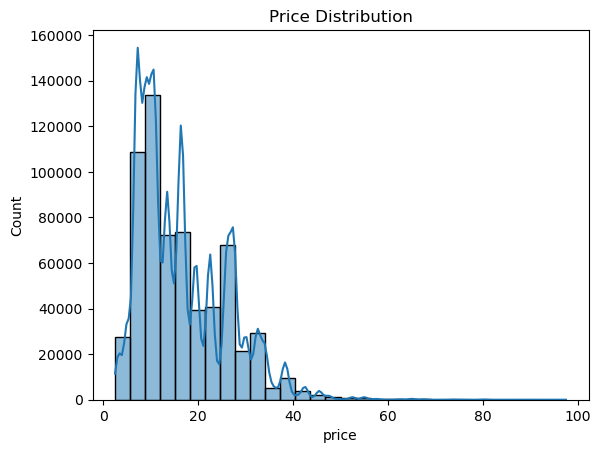

In [68]:
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()


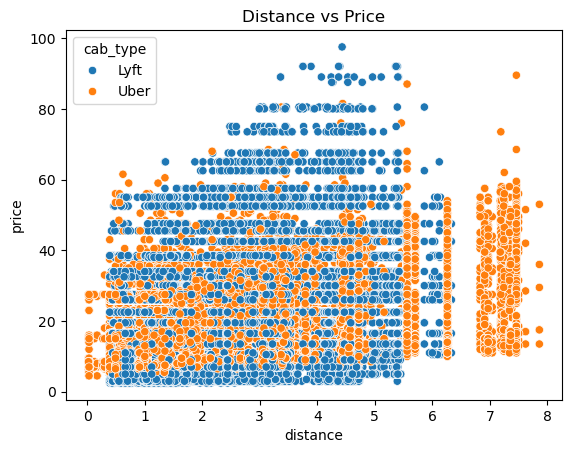

In [72]:
#Distance vs Price Scatter Plot
sns.scatterplot(data, x='distance', y='price', hue='cab_type')
plt.title('Distance vs Price')
plt.show()


Positive Correlation:     
Both Uber and Lyft prices generally increase with distance, as expected.

Lyft (Blue) tends to:          
Be more frequent in higher price ranges for the same distance.       
Have rides priced up to 90–100, especially in the 2–5 distance range.        
Show greater price variability, meaning price varies more for similar distances.

Uber (Orange):          
More tightly clustered between 0–50, especially for distances under 5.         
Fewer outliers or extreme prices.       
Rides beyond 6–7 distance units seem to have a consistent pricing zone around 30–60.      
                                                         
Flat zones at 5, 6, and 7 distance units:          
Vertical lines suggest some fixed-route distances or common drop zones (e.g., airport shuttles, predefined trips).

 Business Insight:         
Lyft might be more expensive or use dynamic pricing more aggressively.           
Uber offers more stable pricing, which might attract cost-sensitive riders.          
Distance is not the only factor — surge multiplier, cab type, and demand also affect pricing.

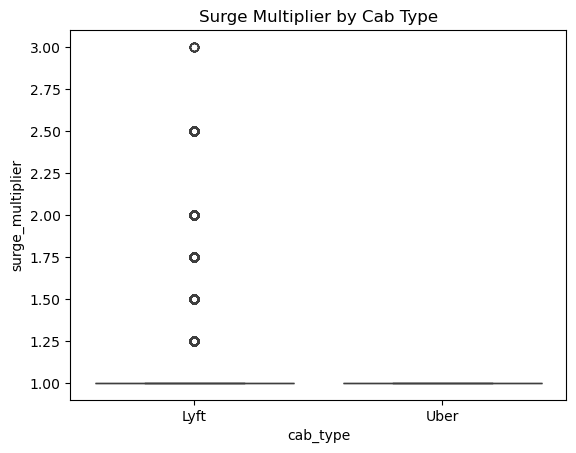

In [80]:
'''
The surge multiplier is a factor applied to the base fare when demand is high.
For example:- 
    If surge_multiplier = 1.0 → No surge
    If surge_multiplier = 1.5 → Fare = 1.5× base price
    If surge_multiplier = 2.0 → Fare = 2× base price (high demand
'''
sns.boxplot(data, x='cab_type', y='surge_multiplier')
plt.title('Surge Multiplier by Cab Type')
plt.show()


Most rides (for both Lyft and Uber) have a surge multiplier of 1.0, 
This means no surge pricing was applied for the majority of trips.
Only Lyft has surge multipliers > 1.0  
Lyft has outliers at:
1.25, 1.5, 1.75, 2.0, 2.5, and even 3.0. 
These dots represent rides that experienced surge pricing.
Uber shows no surge multipliers above 1.0:
Either surge pricing wasn’t applied,
Or your dataset doesn’t include Uber surge-affected rides.

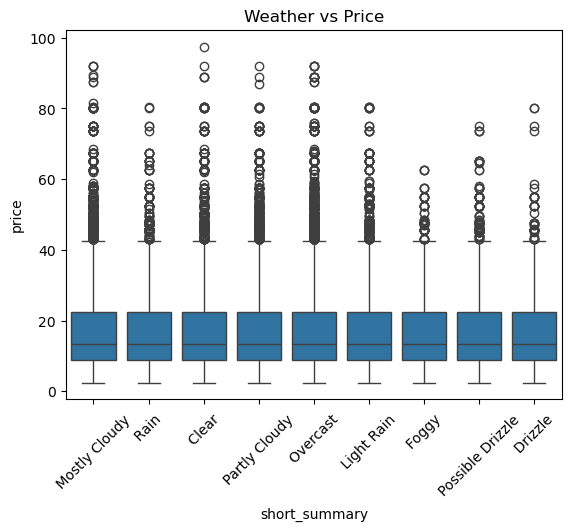

In [76]:
sns.boxplot(data, x='short_summary', y='price')
plt.title('Weather vs Price')
plt.xticks(rotation=45)
plt.show()


Overall price distribution is quite consistent across all weather types:  
Medians for all weather conditions are between 10 and 20. 

Outliers are common:     
For all weather types, some rides go as high as 80–100.  
This suggests rare but expensive trips, possibly due to long distances or surge pricing.     
"Drizzle", "Rain", and "Mostly Cloudy" might show a slightly higher median price compared to "Clear" or "Partly Cloudy".

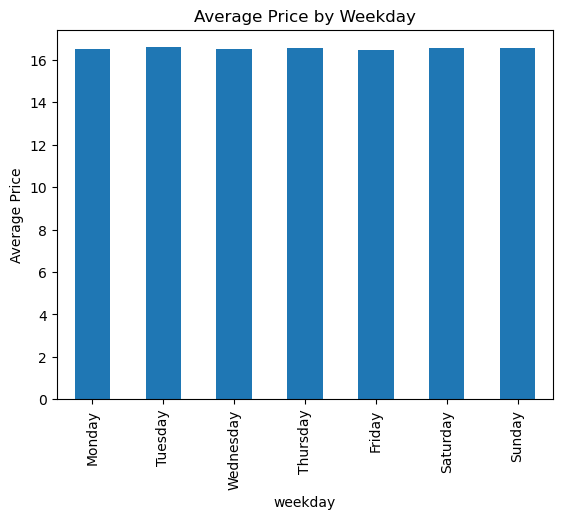

In [94]:
avg_price_day = data.groupby('weekday')['price'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
avg_price_day.plot(kind='bar', title='Average Price by Weekday')
plt.ylabel('Average Price')
plt.show()
